<a href="https://colab.research.google.com/github/GiacomoMM/blood-cell-classification-detection/blob/main/Progetto_LabIA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn as sk
import torch
import torchvision

#Data download

In [2]:
import requests
import zipfile
from pathlib import Path

data_path=Path("data/")
#se ci sono gia i dati
if data_path.is_dir():
  print("directory esiste già")
else:
  data_path.mkdir(parents=True,exist_ok=True)
  print("directory data creata")

with open(data_path / "PBC_dataset_normal_DIB_224.zip","wb") as f:
  request=requests.get("https://github.com/GiacomoMM/blood-cell-classification-detection/raw/main/PBC_dataset_normal_DIB_224.zip?download=")
  print("downloading dataset")
  f.write(request.content)

with zipfile.ZipFile(data_path / "PBC_dataset_normal_DIB_224.zip","r") as zip_f:
  print("unzipping dataset")
  zip_f.extractall(data_path)


directory data creata
downloading dataset
unzipping dataset


In [3]:
import os
def directory(dir_path):
  for dirpath,dirname,filename in os.walk(dir_path):
    print(f"Ci sono {len(dirname)} directory e {len(filename)} immagini in {dirpath}")

In [4]:
directory(data_path)

Ci sono 1 directory e 1 immagini in data
Ci sono 8 directory e 0 immagini in data/PBC_dataset_normal_DIB_224
Ci sono 0 directory e 2348 immagini in data/PBC_dataset_normal_DIB_224/platelet
Ci sono 0 directory e 1420 immagini in data/PBC_dataset_normal_DIB_224/monocyte
Ci sono 0 directory e 1551 immagini in data/PBC_dataset_normal_DIB_224/erythroblast
Ci sono 0 directory e 2895 immagini in data/PBC_dataset_normal_DIB_224/ig
Ci sono 0 directory e 1218 immagini in data/PBC_dataset_normal_DIB_224/basophil
Ci sono 0 directory e 3329 immagini in data/PBC_dataset_normal_DIB_224/neutrophil
Ci sono 0 directory e 1214 immagini in data/PBC_dataset_normal_DIB_224/lymphocyte
Ci sono 0 directory e 3117 immagini in data/PBC_dataset_normal_DIB_224/eosinophil


#Analisi Dati

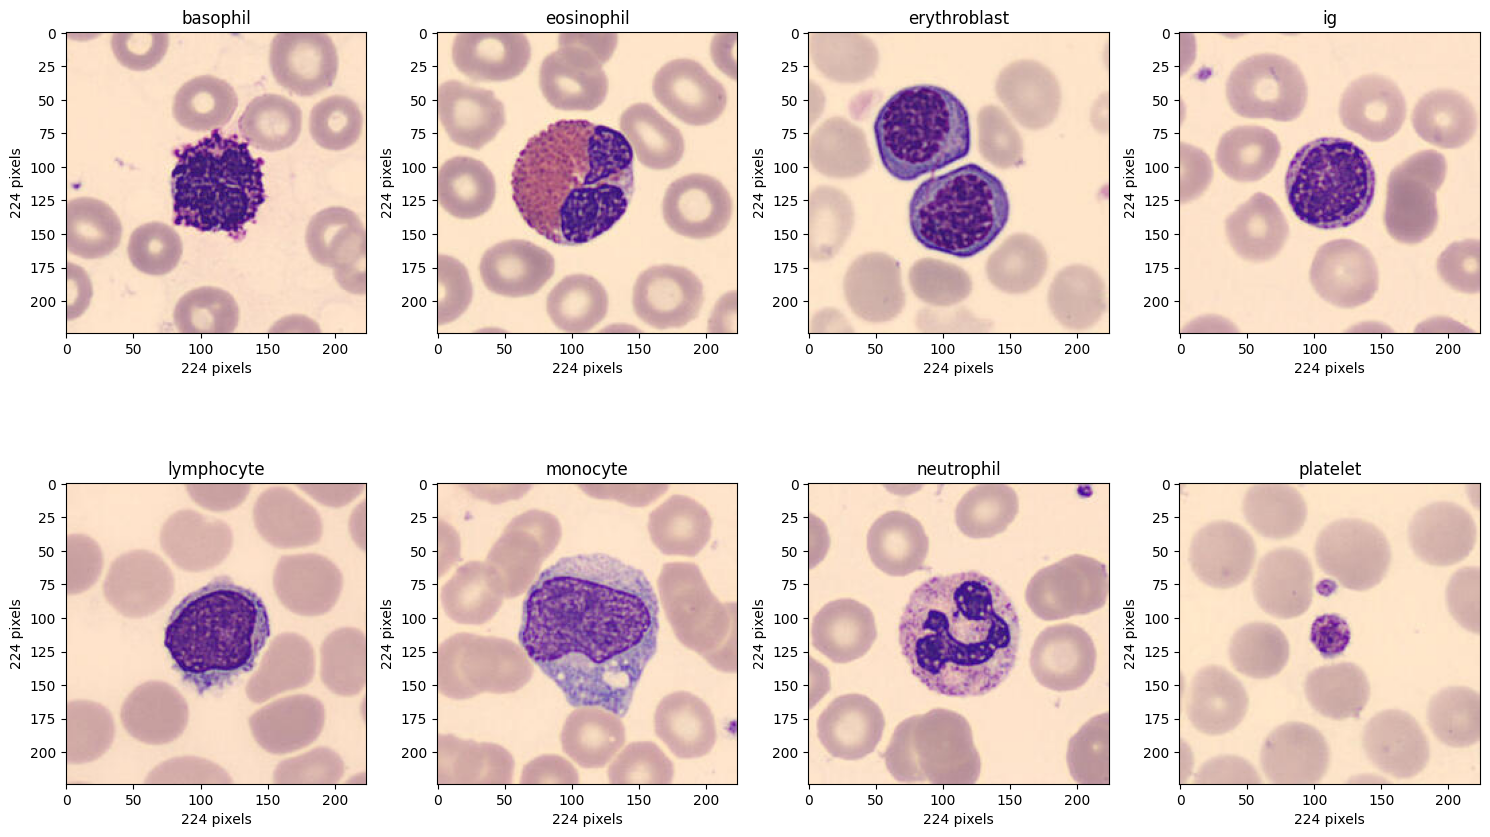

In [5]:
import random
from PIL import Image
import matplotlib.pyplot as plt

lista_path=list()
lista_classi=list()

image_basophil_path=Path("/content/data/PBC_dataset_normal_DIB_224/basophil/")
image_basophil_path_list= list(image_basophil_path.glob("*.jpg"))
random_image_basophil_path=random.choice(image_basophil_path_list)
#image_basophil=Image.open(random_image_basophil_path)
lista_classi.append(random_image_basophil_path.parent.stem)
lista_path.append(random_image_basophil_path)

image_eosinophil_path=Path("/content/data/PBC_dataset_normal_DIB_224/eosinophil/")
image_eosinophil_path_list= list(image_eosinophil_path.glob("*.jpg"))
random_image_eosinophil_path=random.choice(image_eosinophil_path_list)
#image_eosinophil=Image.open(random_image_eosinophil_path)
lista_classi.append(random_image_eosinophil_path.parent.stem)
lista_path.append(random_image_eosinophil_path)

image_erythroblast_path=Path("/content/data/PBC_dataset_normal_DIB_224/erythroblast/")
image_erythroblast_path_list= list(image_erythroblast_path.glob("*.jpg"))
random_image_erythroblast_path=random.choice(image_erythroblast_path_list)
#image_erythroblast=Image.open(random_image_erythroblast_path)
lista_classi.append(random_image_erythroblast_path.parent.stem)
lista_path.append(random_image_erythroblast_path)

image_ig_path=Path("/content/data/PBC_dataset_normal_DIB_224/ig/")
image_ig_path_list= list(image_ig_path.glob("*.jpg"))
random_image_ig_path=random.choice(image_ig_path_list)
#image_ig=Image.open(random_image_ig_path)
lista_classi.append(random_image_ig_path.parent.stem)
lista_path.append(random_image_ig_path)

image_lymphocyte_path=Path("/content/data/PBC_dataset_normal_DIB_224/lymphocyte/")
image_lymphocyte_path_list= list(image_lymphocyte_path.glob("*.jpg"))
random_image_lymphocyte_path=random.choice(image_lymphocyte_path_list)
#image_lymphocyte=Image.open(random_image_lymphocyte_path)
lista_classi.append(random_image_lymphocyte_path.parent.stem)
lista_path.append(random_image_lymphocyte_path)

image_monocyte_path=Path("/content/data/PBC_dataset_normal_DIB_224/monocyte/")
image_monocyte_path_list= list(image_monocyte_path.glob("*.jpg"))
random_image_monocyte_path=random.choice(image_monocyte_path_list)
#image_monocyte=Image.open(random_image_monocyte_path)
lista_classi.append(random_image_monocyte_path.parent.stem)
lista_path.append(random_image_monocyte_path)

image_neutrophil_path=Path("/content/data/PBC_dataset_normal_DIB_224/neutrophil/")
image_neutrophil_path_list= list(image_neutrophil_path.glob("*.jpg"))
random_image_neutrophil_path=random.choice(image_neutrophil_path_list)
#image_neutrophil=Image.open(random_image_neutrophil_path)
lista_classi.append(random_image_neutrophil_path.parent.stem)
lista_path.append(random_image_neutrophil_path)

image_platelet_path=Path("/content/data/PBC_dataset_normal_DIB_224/platelet/")
image_platelet_path_list= list(image_platelet_path.glob("*.jpg"))
random_image_platelet_path=random.choice(image_platelet_path_list)
#image_platelet=Image.open(random_image_platelet_path)
lista_classi.append(random_image_platelet_path.parent.stem)
lista_path.append(random_image_platelet_path)


plot,axs=plt.subplots(nrows=2,ncols=4,figsize=(15,15))

for i in range(8):
  image =Image.open(lista_path[i])
  ax = axs[i // 4, i % 4]
  ax.imshow(image)
  ax.set_title(f"{lista_classi[i]}")
  width, height = image.size
  ax.set_xlabel(f"{width} pixels")
  ax.set_ylabel(f"{height} pixels")

plt.tight_layout(h_pad=-26.0)
plt.show()


In [6]:
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder

transform = transforms.Compose([
    transforms.Resize(size=(64,64)),
    transforms.ToTensor()
])

dataset = ImageFolder(root="/content/data/PBC_dataset_normal_DIB_224", transform=transform, allow_empty=False)
print(dataset.classes)
print(dataset.class_to_idx)
print(f"Numero totale di immagini: {len(dataset)}")


['basophil', 'eosinophil', 'erythroblast', 'ig', 'lymphocyte', 'monocyte', 'neutrophil', 'platelet']
{'basophil': 0, 'eosinophil': 1, 'erythroblast': 2, 'ig': 3, 'lymphocyte': 4, 'monocyte': 5, 'neutrophil': 6, 'platelet': 7}
Numero totale di immagini: 17092


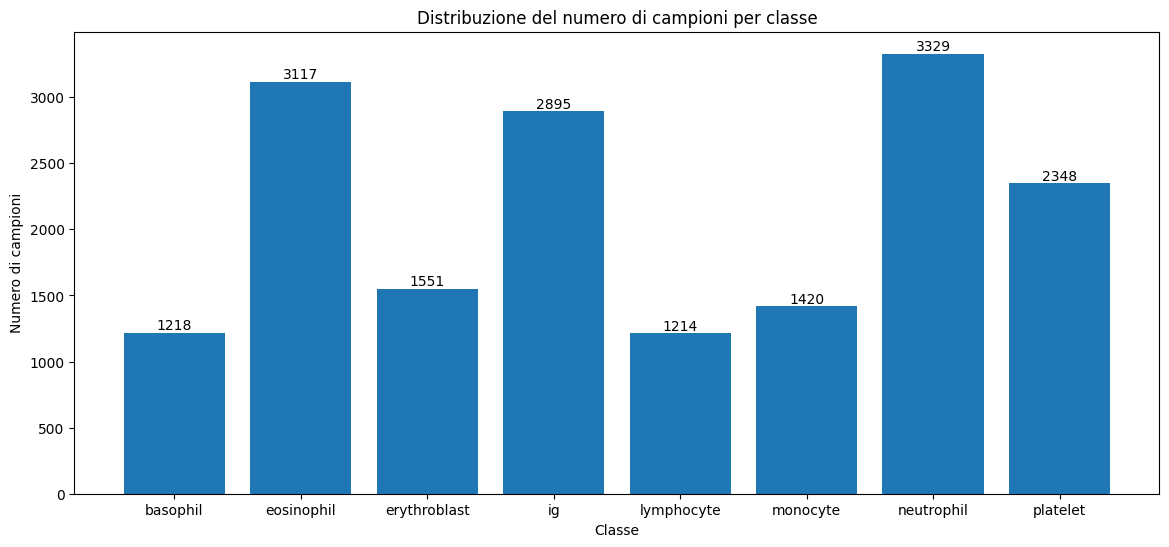

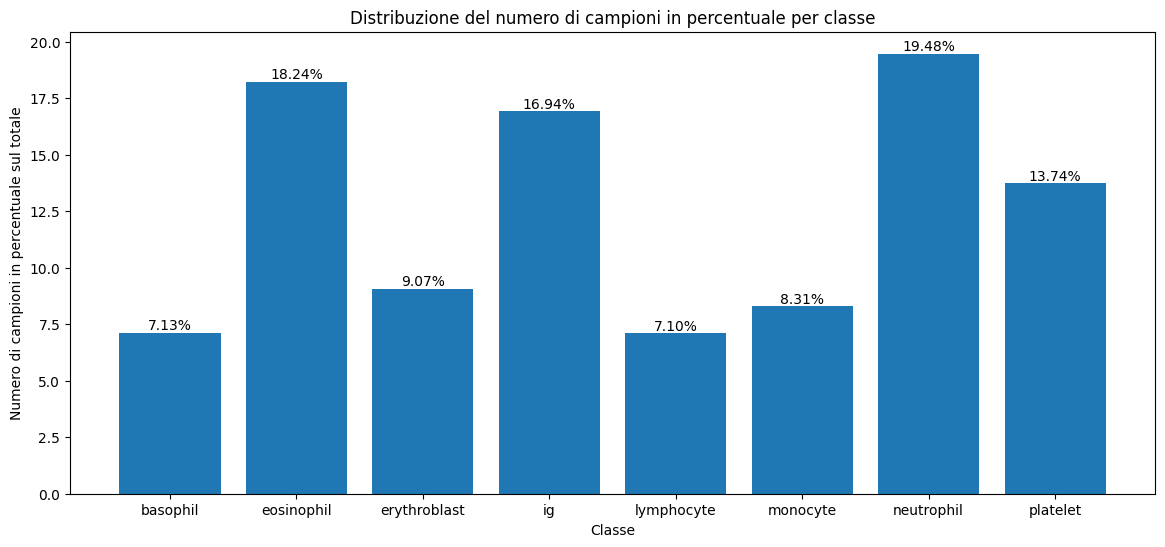

In [7]:
classes = dataset.classes
class_counts = [0]*8

for _, indx in dataset:
    class_counts[indx] += 1

plt.figure(figsize=(14, 6))
bar=plt.bar(classes, class_counts)
plt.bar_label(bar)
plt.xlabel("Classe")
plt.ylabel("Numero di campioni")
plt.title("Distribuzione del numero di campioni per classe")
plt.show()

#percentuale sul totale
for i in range(len(class_counts)):
  class_counts[i]=class_counts[i]/len(dataset)*100


plt.figure(figsize=(14, 6))
bar=plt.bar(classes, class_counts)
plt.bar_label(bar,fmt="%.2f%%")
plt.xlabel("Classe")
plt.ylabel("Numero di campioni in percentuale sul totale")
plt.title("Distribuzione del numero di campioni in percentuale per classe")
plt.show()

#Manipolazione Dati

In [8]:
if torch.cuda.is_available():
    device = torch.device('cuda')
else:
    device = torch.device('cpu')
print('Using PyTorch version:', torch.__version__, ' Device:', device)

torch.manual_seed(42)
if torch.cuda.is_available():
    torch.cuda.manual_seed(42)
    torch.cuda.manual_seed_all(42)

torch.backends.cudnn.determinstic = True
torch.backends.cudnn.benchmark = False

Using PyTorch version: 2.3.0+cu121  Device: cpu


In [9]:
from torch.utils.data import DataLoader,random_split,TensorDataset

train_size = int(0.6 * len(dataset))
val_size = int(0.2 * len(dataset))
test_size= len(dataset)-train_size-val_size

dataset_loader = DataLoader(dataset, batch_size=len(dataset), shuffle=True)

data_loader, label_loader = next(iter(dataset_loader))

dataset_mix = TensorDataset(data_loader, label_loader)

In [10]:
c_label_train=0
c_label_val=0
c_label_test=0
while(c_label_train<8 and c_label_val<8 and c_label_test<8):
  train_dataset,val_dataset,test_dataset = random_split(dataset_mix,[train_size,val_size,test_size])
  labels=[]
  for idx,(img,label) in enumerate(train_dataset):
    if label not in labels:
      labels.append(label)
      c_label_train=c_label_train+1
  print(f"c_label_train: {c_label_train}")
  labels=[]
  for idx,(img,label) in enumerate(val_dataset):
    if label not in labels:
      labels.append(label)
      c_label_val=c_label_val+1
  print(f"c_label_val: {c_label_val}")
  labels=[]
  for idx,(img,label) in enumerate(test_dataset):
    if label not in labels:
      labels.append(label)
      c_label_test=c_label_test+1
  print(f"c_label_test: {c_label_test}")

c_label_train: 8
c_label_val: 8
c_label_test: 8


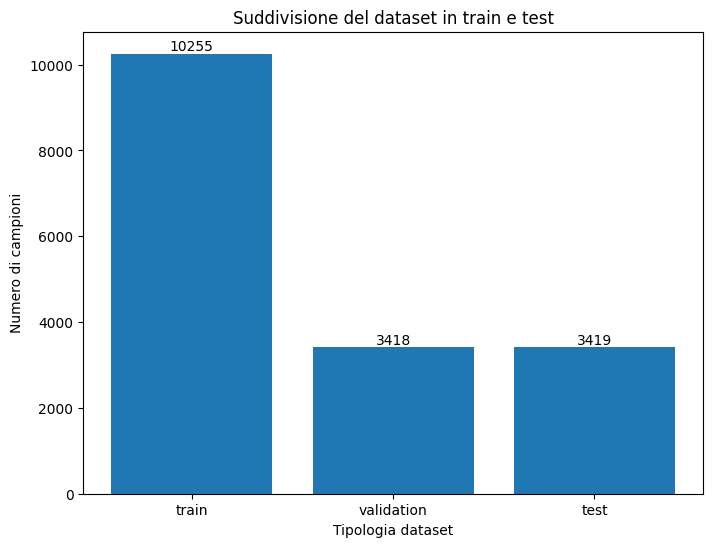

In [11]:
plt.figure(figsize=(8, 6))
bar=plt.bar(["train","validation", "test"], [len(train_dataset.indices),len(val_dataset.indices),len(test_dataset.indices)])
plt.bar_label(bar)
plt.xlabel("Tipologia dataset")
plt.ylabel("Numero di campioni")
plt.title("Suddivisione del dataset in train e test")
plt.show()

In [12]:
#DataLoader
train_loader=DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader=DataLoader(val_dataset, batch_size=64, shuffle=False)
test_loader=DataLoader(test_dataset, batch_size=64, shuffle=False)

dataiter = iter(train_loader)
images, labels = next(dataiter)
print("tipologia loader: ",type(images))
print("shape immagine: ",images.shape)
print("label shape: ",labels.shape)

tipologia loader:  <class 'torch.Tensor'>
shape immagine:  torch.Size([64, 3, 64, 64])
label shape:  torch.Size([64])


In [13]:
data = []
for idx, (image, label) in enumerate(train_dataset):
    image_np = np.asarray(image)
    data.append({
        "image": image_np.flatten(),
        "label": dataset.classes[label],
    })
train_pd = pd.DataFrame(data)
train_pd = train_pd.sample(frac=1).reset_index(drop=True)

data = []
for idx, (image, label) in enumerate(val_dataset):
    image_np = np.asarray(image)
    data.append({
        "image": image_np.flatten(),
        "label": dataset.classes[label],
    })
val_pd = pd.DataFrame(data)
val_pd = val_pd.sample(frac=1).reset_index(drop=True)

data = []
for idx, (image, label) in enumerate(test_dataset):
    image_np = np.asarray(image)
    data.append({
        "image": image_np.flatten(),
        "label": dataset.classes[label],
    })
test_pd = pd.DataFrame(data)
test_pd = val_pd.sample(frac=1).reset_index(drop=True)

train_pd.head()

,image,label
0,"[0.7764706, 0.78039217, 0.78431374, 0.7921569,...",neutrophil
1,"[0.83137256, 0.8, 0.78431374, 0.7647059, 0.756...",eosinophil
2,"[0.8509804, 0.84705883, 0.84313726, 0.84313726...",eosinophil
3,"[0.99215686, 0.99215686, 0.9843137, 0.94509804...",neutrophil
4,"[0.8666667, 0.93333334, 0.9372549, 0.8901961, ...",erythroblast


In [14]:
#divisione feature
X_train_pd =train_pd["image"]
y_train_pd =train_pd["label"]

X_val_pd =val_pd["image"]
y_val_pd =val_pd["label"]

X_test_pd =test_pd["image"]
y_test_pd =test_pd["label"]
print(len(y_train_pd.unique()))
print(len(y_val_pd.unique()))
print(len(y_test_pd.unique()))

8
8
8


#Modello 1: Logistic Regression

In [15]:
import warnings
from sklearn.exceptions import ConvergenceWarning
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

#ricerca iperparametro learning rate
warnings.filterwarnings('ignore',category=ConvergenceWarning)
learning_rate=100
best_rate=[]
best_accuracy=[]
for i in range(7):
  model = LogisticRegression(max_iter=5,solver="sag",n_jobs=-1,C=learning_rate)
  model.fit(X_train_pd.to_list(), y_train_pd)
  y_pred = model.predict(X_val_pd.to_list())
  accuracy = accuracy_score(y_val_pd, y_pred)
  print(f"Accuracy: {accuracy} con learning rate: {learning_rate}")
  best_rate.append(learning_rate)
  best_accuracy.append(accuracy)
  learning_rate=learning_rate/10


Accuracy: 0.6986541837331773 con learning rate: 100
Accuracy: 0.7346401404330017 con learning rate: 10.0
Accuracy: 0.7267407840842598 con learning rate: 1.0
Accuracy: 0.7279110590988882 con learning rate: 0.1
Accuracy: 0.6307782328847279 con learning rate: 0.01
Accuracy: 0.6331187829139848 con learning rate: 0.001
Accuracy: 0.5877706260971328 con learning rate: 0.0001


miglior accuracy: 0.7346401404330017
miglior rate: 10.0


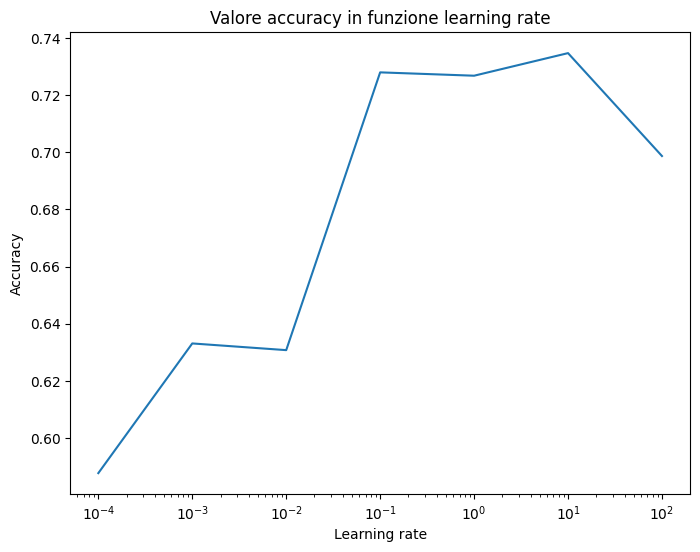

In [16]:
accuracy=max(best_accuracy)
idx=best_accuracy.index(accuracy)
learning_rate=best_rate[idx]
print(f"miglior accuracy: {accuracy}")
print(f"miglior rate: {learning_rate}")

plt.figure(figsize=(8, 6))
plt.plot(best_rate,best_accuracy)
plt.xscale('log')
plt.xlabel("Learning rate")
plt.ylabel("Accuracy")
plt.title("Valore accuracy in funzione learning rate")
plt.show()

In [25]:
model = LogisticRegression(max_iter=1,solver="sag",n_jobs=-1,C=learning_rate)
model.fit(X_train_pd.to_list(), y_train_pd)
y_pred = model.predict(X_test_pd.to_list())

In [26]:
#accuracy score
accuracy_lr=accuracy_score(y_test_pd,y_pred)
print(f"Valore accuracy:{accuracy_lr}")

Valore accuracy:0.361029842012873


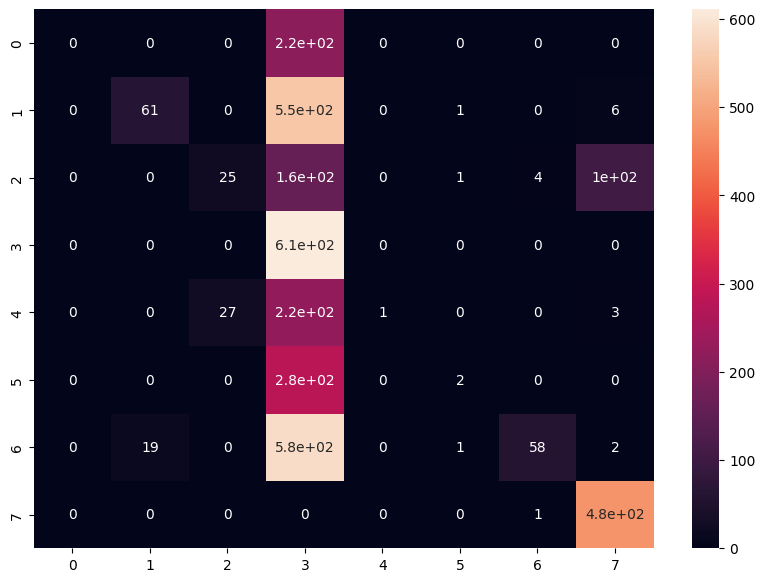

In [28]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

#plot confusion_matrix
cm = confusion_matrix(y_test_pd,y_pred)
df_cm = pd.DataFrame(cm, index=range(8), columns=range(8))
plt.figure(figsize=(10, 7))
sns.heatmap(df_cm, annot=True)
plt.show()

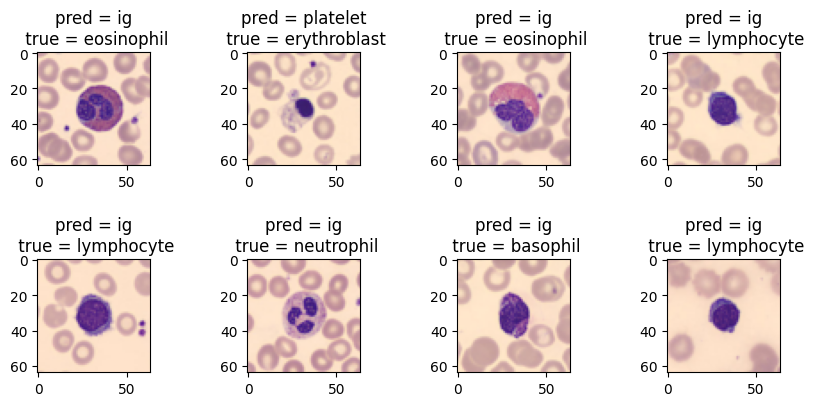

In [100]:
misclassified = np.where(y_pred != y_test_pd)[0]
plot,axs=plt.subplots(nrows=2,ncols=4,figsize=(8,8))
for i in range(8):
  ax = axs[i // 4, i % 4]
  im=X_test_pd.iloc[misclassified[i*5]]
  im=im.reshape(3,64,64).T
  ax.imshow(im)
  ax.set_title("pred = " + y_pred[misclassified[i*5]] + "\n true = " + y_test_pd.iloc[misclassified[i*5]])
plt.tight_layout(h_pad=-20.0,w_pad=5)
plt.show()

In [128]:
coefficients = model.coef_
coefficients[0]

array([-0.00052801, -0.00034617,  0.00015952, ...,  0.00110882,
        0.00096336,  0.00090444])

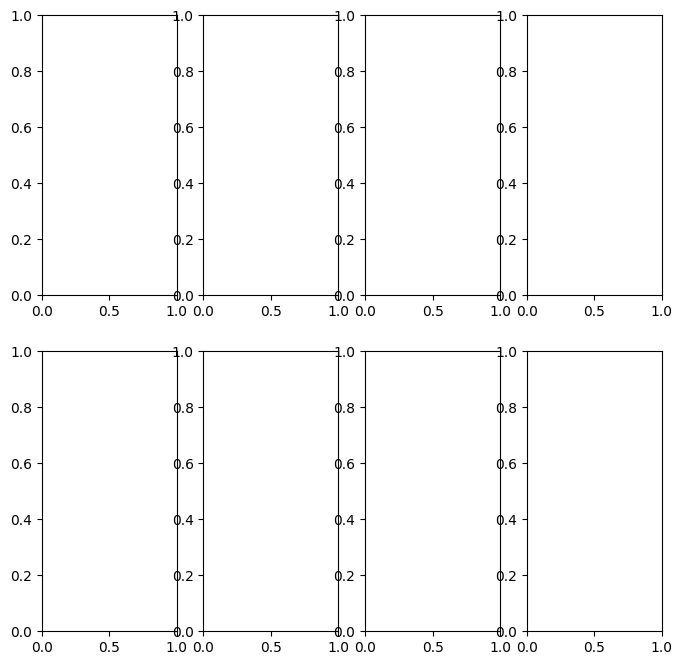

In [139]:
coefficients = model.coef_
image_shape = (3,64,64)
n_classes = coefficients.shape[0]
images = []


plot,axs=plt.subplots(nrows=2,ncols=4,figsize=(8,8))
for coef in coefficients:
  im=coef.reshape(3,64,64).T
  ax.imshow(im)

#Modello 2:

#Modello 3: DecisionTree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()

clf = clf.fit(X_train_pd.to_list(),y_train_pd)

y_pred = clf.predict(X_test_pd.to_list())

accuracy = accuracy_score(y_test_pd, y_pred)
print(f'Accuracy: {accuracy:.2f}')